# 분류 classification
- regression: MSE(Mean, Square Error): mean(square(Y:정답 h:예측))
- classification: Cross Entropy: -Y \* log(h), Y=(0,1)

---
머신러닝에 필요한 소양 3가지(개인 의견)
- 프로그래밍
- 알고리즘
- 수학

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
np.log10(0), np.log10(0.001), np.log10(10), np.log10(100), np.log10(1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-inf, -3.0, 1.0, 2.0, 3.0)

In [86]:
2**2, 2**3, 2**4 

(4, 8, 16)

In [87]:
2**-1, 2**-2, 2**-3, 2**-4

(0.5, 0.25, 0.125, 0.0625)

In [88]:
np.log(1), np.log(2.71), np.log(5)

(0.0, 0.99694863489160956, 1.6094379124341003)

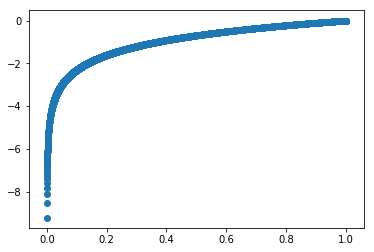

In [89]:
x = np.arange(0.0001, 1, 0.0001)
y = np.log(x)
plt.scatter(x, y)

In [2]:
Y = [0, 1, 0] # 정답
h = [0.1, 0.9, 0.7] # 예측
y = np.array(Y)
h = np.array(h)

In [4]:
mae = np.mean(np.abs(y - h)) # MAE(평균 절대값 오차)
mse = np.mean(np.square(y -h)) # MSE(평균 제곱 오차)
ce = np.mean(-(y * np.log(h) + (1-y) * np.log(1-h))) # 크로스 엔트로피
mae, mse, ce

(0.29999999999999999, 0.16999999999999996, 0.47156461188052951)

In [ ]:
y * np.log(h) # y = 1인 데이터의 오차

In [ ]:
(1-y) * np.log(1-h) # y = 0인 데이터의 오차

In [5]:
y = np.array([0, 0, 0, 1, 1, 1])
h = np.array([0.001, 0.1, 0.9, 0.9999, 0.9, 0.3])
np.set_printoptions(precision=3, suppress=True)

In [6]:
-(y * np.log(h) + (1-y) * np.log(1-h))

array([ 0.001,  0.105,  2.303,  0.   ,  0.105,  1.204])

코로나 바이러스/ 분류 / "바이러스가 있냐(1) 없냐(0)"
- 샘플이 더 적고 관심있는 것 = 1
- 증상 : 발열, 기침(분당 횟수), 두통 정도(0:정상~10:아프다), 중국 방문 여부(1:방문 0:없음)

In [37]:
x = [[37, 3, 3, 0], [39, 5, 7, 1], [36, 5, 7, 0], [38, 10, 2, 1], [36.6, 2, 2, 0], [37.3, 0, 2, 0], [37.5, 4, 6, 0],[36.5, 0, 0, 0]]
y = [0, 1, 0, 1, 0, 0, 1, 0]
x_test = [[38, 5, 1, 0], [37, 10, 5, 1]]

logistic regression 모델을 사용해서 위 데이터를 학습시키고 테스트셋을 예측하세요

keras로 위 데이터를 학습시키고 테스트셋을 예측하세요

In [38]:
from sklearn.neural_network import MLPClassifier

In [72]:
# min max 정규화 [0~1]
# [1,2,3] > [0, 0.5, 1] 최소값 0, 최대값 1이 되도록 변경
# [1,2,3] - 1(최소값) = [0,1,2] / 2(최대값-최소값) = [0, 0.5, 1]
x = np.array(x)
x_test = np.array(x_test)
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
x_norm_test = (x_test - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
x_norm

array([[ 0.333,  0.3  ,  0.429,  0.   ],
       [ 1.   ,  0.5  ,  1.   ,  1.   ],
       [ 0.   ,  0.5  ,  1.   ,  0.   ],
       [ 0.667,  1.   ,  0.286,  1.   ],
       [ 0.2  ,  0.2  ,  0.286,  0.   ],
       [ 0.433,  0.   ,  0.286,  0.   ],
       [ 0.5  ,  0.4  ,  0.857,  0.   ],
       [ 0.167,  0.   ,  0.   ,  0.   ]])

In [76]:
#Multi Layer Perceptron 분류기
model = MLPClassifier(max_iter=1000).fit(x_norm,y)
model.predict(x_norm), model.predict(x_norm_test)

(array([0, 1, 0, 1, 0, 0, 1, 0]), array([0, 1]))

붓꽃 데이터를 받아서 클래스 0,1만 가지고(150개 중 100개) MLP로 학습시켜 보세요.

In [78]:
from sklearn.datasets import load_iris
x, y = load_iris(True)
x = x[:100]
y = y[:100]
x.shape, y.shape

((100, 4), (100,))

In [84]:
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
model = MLPClassifier(max_iter=1000).fit(x_norm, y)
model.score(x_norm, y)

1.0

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
model.predict(x)

array([0, 1, 1, 1, 0, 0, 0, 0])

In [20]:
model.predict_proba(x)

array([[ 0.813,  0.187],
       [ 0.314,  0.686],
       [ 0.333,  0.667],
       [ 0.082,  0.918],
       [ 0.902,  0.098],
       [ 0.967,  0.033],
       [ 0.562,  0.438],
       [ 0.978,  0.022]])

In [21]:
# 해석: 발열, 기침, 두통, 중국방문
model.coef_, model.intercept_

(array([[-0.102,  0.547,  0.242,  0.396]]), array([-0.048]))

In [22]:
def sigmoid(x): # 점수 score -> 확률 probability(합이 1)로 변환
    return 1/ (1+np.exp(-x))

In [23]:
# y = sigmoid(WX + b)
sigmoid(np.sum(model.coef_ * x, axis=1) + model.intercept_)

array([ 0.187,  0.686,  0.667,  0.918,  0.098,  0.033,  0.438,  0.022])

성능 지표
- 정확도 accuracy : 정답과 예측의 동일한 비율 
    - (0, 1 중에 1의 샘플이 적은 경우 사용하지 않습니다: 대부분 1이 훨씬 적습니다.)
- precision 정밀도, recall 재현율

In [24]:
y = [0,0,0,0,0,0,0,0,1,1] # 정답
h = [0,0,0,0,0,1,1,1,1,1] # 예측

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [30]:
# 정밀율: 1이라고 예측한 것(5개) 중에 맞은(2개) 비율 
# 재현율: 1(2개) 중에 맞춘(2개) 비율
precision_score(y, h), recall_score(y, h)

(0.40000000000000002, 1.0)

In [ ]:
y = [0,0,1,1]
h = [0,0,0,1]

In [ ]:
y = [0,0,0,1]
h = [0,1,1,1]

In [34]:
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]
h = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [35]:
accuracy_score(y,h), precision_score(y,h), recall_score(y,h)

(0.068965517241379309, 0.068965517241379309, 1.0)

In [26]:
accuracy_score(y, h)

0.69999999999999996

In [28]:
# y축: 정답, x축: 예측
confusion_matrix(y, h) # 혼동 행렬
# 3 : y=0인데 h=1이라고 잘못 예측한 샘플

array([[5, 3],
       [0, 2]], dtype=int64)

In [ ]:
y = [0, 1, 2]
y_hot = [[1,0,0], [0,1,0], [0,0,1]] # one-hot 인코딩
h = [[0.999, 0.0001, 0], [0, 0.99, 0], [0.001, 0.1, 0.88]] # 정확한 예측이 나왔다